In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

### Sequential

In [2]:
model=keras.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(784,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [ ]:
#or

In [3]:
model=keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

### functional

In [5]:
inputs = keras.Input(shape=(784,))
x1 = layers.Dense(64, activation="relu")(inputs)
x2 = layers.Dense(64, activation="relu")(x1)
outputs = layers.Dense(10)(x2)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary() #### در مورد لایه ورودی توضیح میده

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


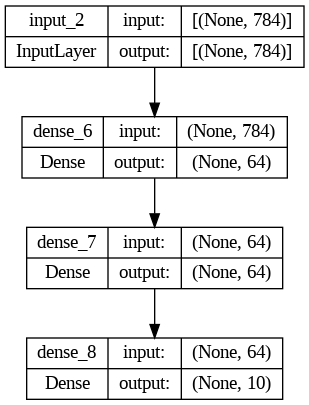

In [8]:
keras.utils.plot_model(model, show_shapes=True)

more:
    https://keras.io/guides/functional_api/

In [14]:
inputs = keras.Input(shape=(784,))
x1_1 = layers.Dense(64, activation="relu")(inputs)
x1_2 = layers.Dense(64, activation="sigmoid")(inputs)
x1_3 = layers.Dense(64, activation="tanh")(inputs)
x1=layers.Add()([x1_1,x1_2,x1_3])
x2 = layers.Dense(64, activation="relu")(x1)
outputs = layers.Dense(10)(x2)
model2 = keras.Model(inputs=inputs, outputs=outputs)

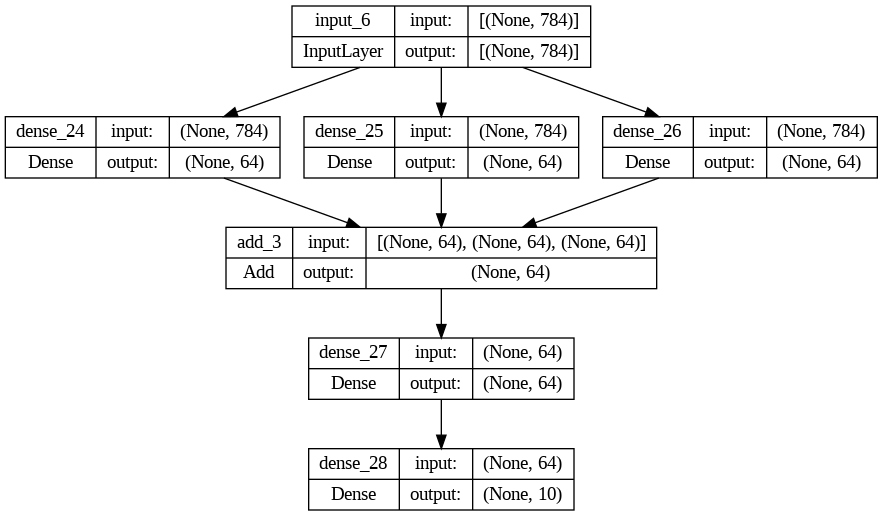

In [16]:
keras.utils.plot_model(model2, show_shapes=True)

In [20]:
### residual

inputs = keras.Input(shape=(784,))
x1 = layers.Dense(64, activation="relu")(inputs)
x2 = layers.Dense(784, activation="relu")(x1) #### چون میخوای جمع کنی باید x2  و ورودی هم دایمنشن باشند
x_residual=layers.Add()([x2,inputs])
residual=layers.Activation('relu')(x_residual)
outputs = layers.Dense(10)(residual)
model3 = keras.Model(inputs=inputs, outputs=outputs)

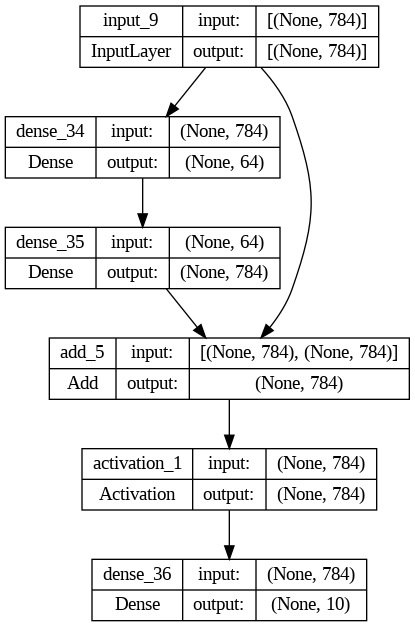

In [21]:
keras.utils.plot_model(model3, show_shapes=True)

In [ ]:
حالا یه لیستی از ورودی و لیستی از خروجی رو اینجا بدم: ### model = keras.Model(inputs=inputs, outputs=outputs)

In [27]:
inputs1 = keras.Input(shape=(784,))
inputs2 = keras.Input(shape=(784,))
x1 = layers.Dense(64, activation="relu")(inputs1)
x2 = layers.Dense(784)(x1) #### چون میخوای جمع کنی باید x2  و ورودی هم دایمنشن باشند
x2_2=layers.Dense(784)(inputs2)
x_residual=layers.Add()([inputs1,x2])
x_residual=layers.Activation('relu')(x_residual)
x=layers.Concatenate()([x_residual,x2_2])
outputs = layers.Dense(10)(x)
model4 = keras.Model([inputs1,inputs2], outputs=outputs)

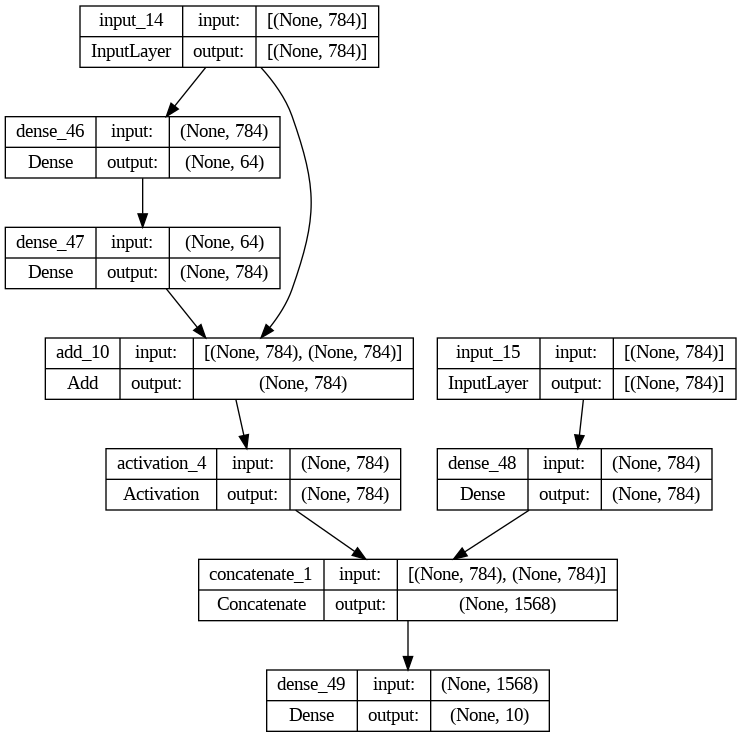

In [28]:
keras.utils.plot_model(model4, show_shapes=True)

In [30]:
inputs1 = keras.Input(shape=(784,))
inputs2 = keras.Input(shape=(784,))
x1 = layers.Dense(64, activation="relu")(inputs1)
x2 = layers.Dense(784)(x1) #### چون میخوای جمع کنی باید x2  و ورودی هم دایمنشن باشند
x2_2=layers.Dense(784)(inputs2)
x_residual=layers.Add()([inputs1,x2])
x_residual=layers.Activation('relu')(x_residual)
x=layers.Concatenate()([x_residual,x2_2])
outputs1 = layers.Dense(10, activation='sigmoid')(x)
outputs2 = layers.Dense(3, activation='linear')(x)

model5 = keras.Model([inputs1,inputs2], outputs=[outputs1,outputs2])

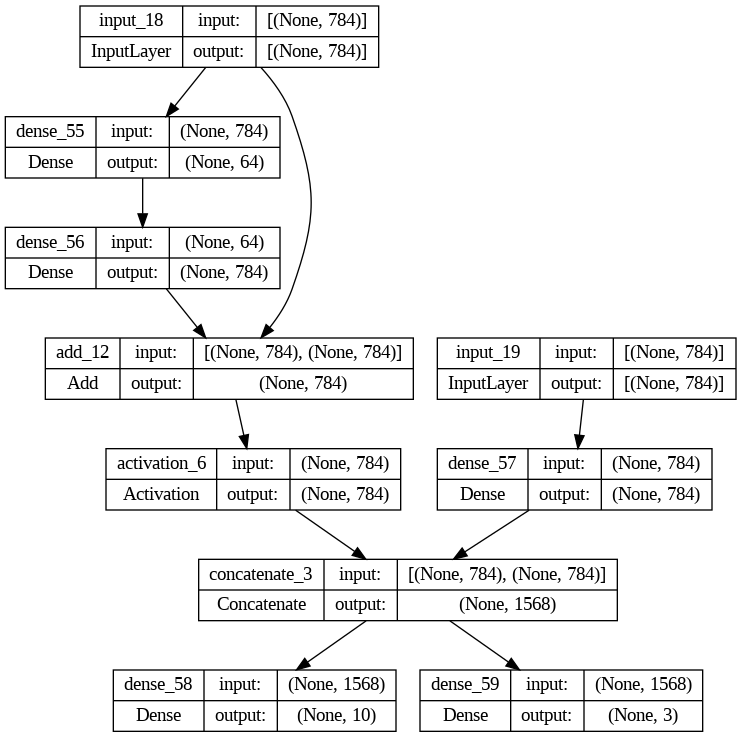

In [31]:
keras.utils.plot_model(model5, show_shapes=True)

In [24]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()


Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)             0         ['conv2d_1[0][0]']            
 D)                                                                                      

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)
